#### 📦 1 | Install & Impoty Required Packages
---

**1.1 | Install Required Packages**

In [7]:
!pip install biopython
!pip install plotnine

**1.2 | Import Required Packages**

In [8]:
from    Bio import Entrez
import  pandas as pd
from    datetime import datetime
from    plotnine import *
from    mizani.formatters import comma_format

#### 🚰  2 | Query PubMed API for Publication Counts
---

In [9]:
def fetch_pubmed_data_for_multiple_terms(search_terms, start_year, end_year):
    """
    Fetches publication counts from PubMed for multiple search terms over a range of years.

    :param search_terms: Dictionary of search terms (diseases) and their PubMed query strings.
    :param start_year: Start year for the data collection.
    :param end_year: End year for the data collection.
    :return: DataFrame with years as rows and diseases as columns, containing publication counts.
    """
    publication_counts = {term: [] for term in search_terms}
    years = range(start_year, end_year + 1)
    Entrez.email = "rory@eudemo.co"

    for year in years:
        for term, query in search_terms.items():
            # Constructing the query with the search term and year
            full_query = f"{query} AND ({year}[Date - Publication])"
            handle = Entrez.esearch(db="pubmed", term=full_query, retmax=100000)
            record = Entrez.read(handle)
            count = int(record["Count"])
            publication_counts[term].append(count)
            handle.close()

    # Creating a DataFrame from the collected data
    df = pd.DataFrame(publication_counts, index=years)
    df.index.name = 'Year'
    return df

# Define the search terms for each disease
search_terms = {
    "ME/CFS": "ME/CFS OR Myalgic Encephalomyelitis OR Chronic Fatigue Syndrome",
    "Long Covid": "Long Covid",
    "Multiple Sclerosis": "Multiple Sclerosis",
    "HIV/AIDS": "HIV OR AIDS OR HIV/AIDS"
}

# Define the start and end years for the search
start_year = 1980
end_year = 2023  # Assuming current year as end year

# Fetching the data (to be executed in an environment where Biopython is installed)
publications_df = fetch_pubmed_data_for_multiple_terms(search_terms, start_year, end_year)

# Check result
publications_df.head()

,ME/CFS,Long Covid,Multiple Sclerosis,HIV/AIDS
Year,,,,
1980,7,0,520,526
1981,7,0,517,485
1982,5,0,589,535
1983,3,0,609,1249
1984,17,0,672,1710


In [10]:
# Transforming the DataFrame to long format
long_df = publications_df.reset_index().melt(id_vars='Year', var_name='Disease', value_name='Publications')

# Calculating cumulative publications for each disease
long_df['Cumulative Publications'] = long_df.groupby('Disease')['Publications'].cumsum()

# Check result
long_df

,Year,Disease,Publications,Cumulative Publications
0,1980,ME/CFS,7,7
1,1981,ME/CFS,7,14
2,1982,ME/CFS,5,19
3,1983,ME/CFS,3,22
4,1984,ME/CFS,17,39
...,...,...,...,...
171,2019,HIV/AIDS,20611,483549
172,2020,HIV/AIDS,22577,506126
173,2021,HIV/AIDS,23342,529468
174,2022,HIV/AIDS,22836,552304


#### 📈  3 | Visualise Results
---

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 3 values. 4 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 3 values. 4 were requested from it.


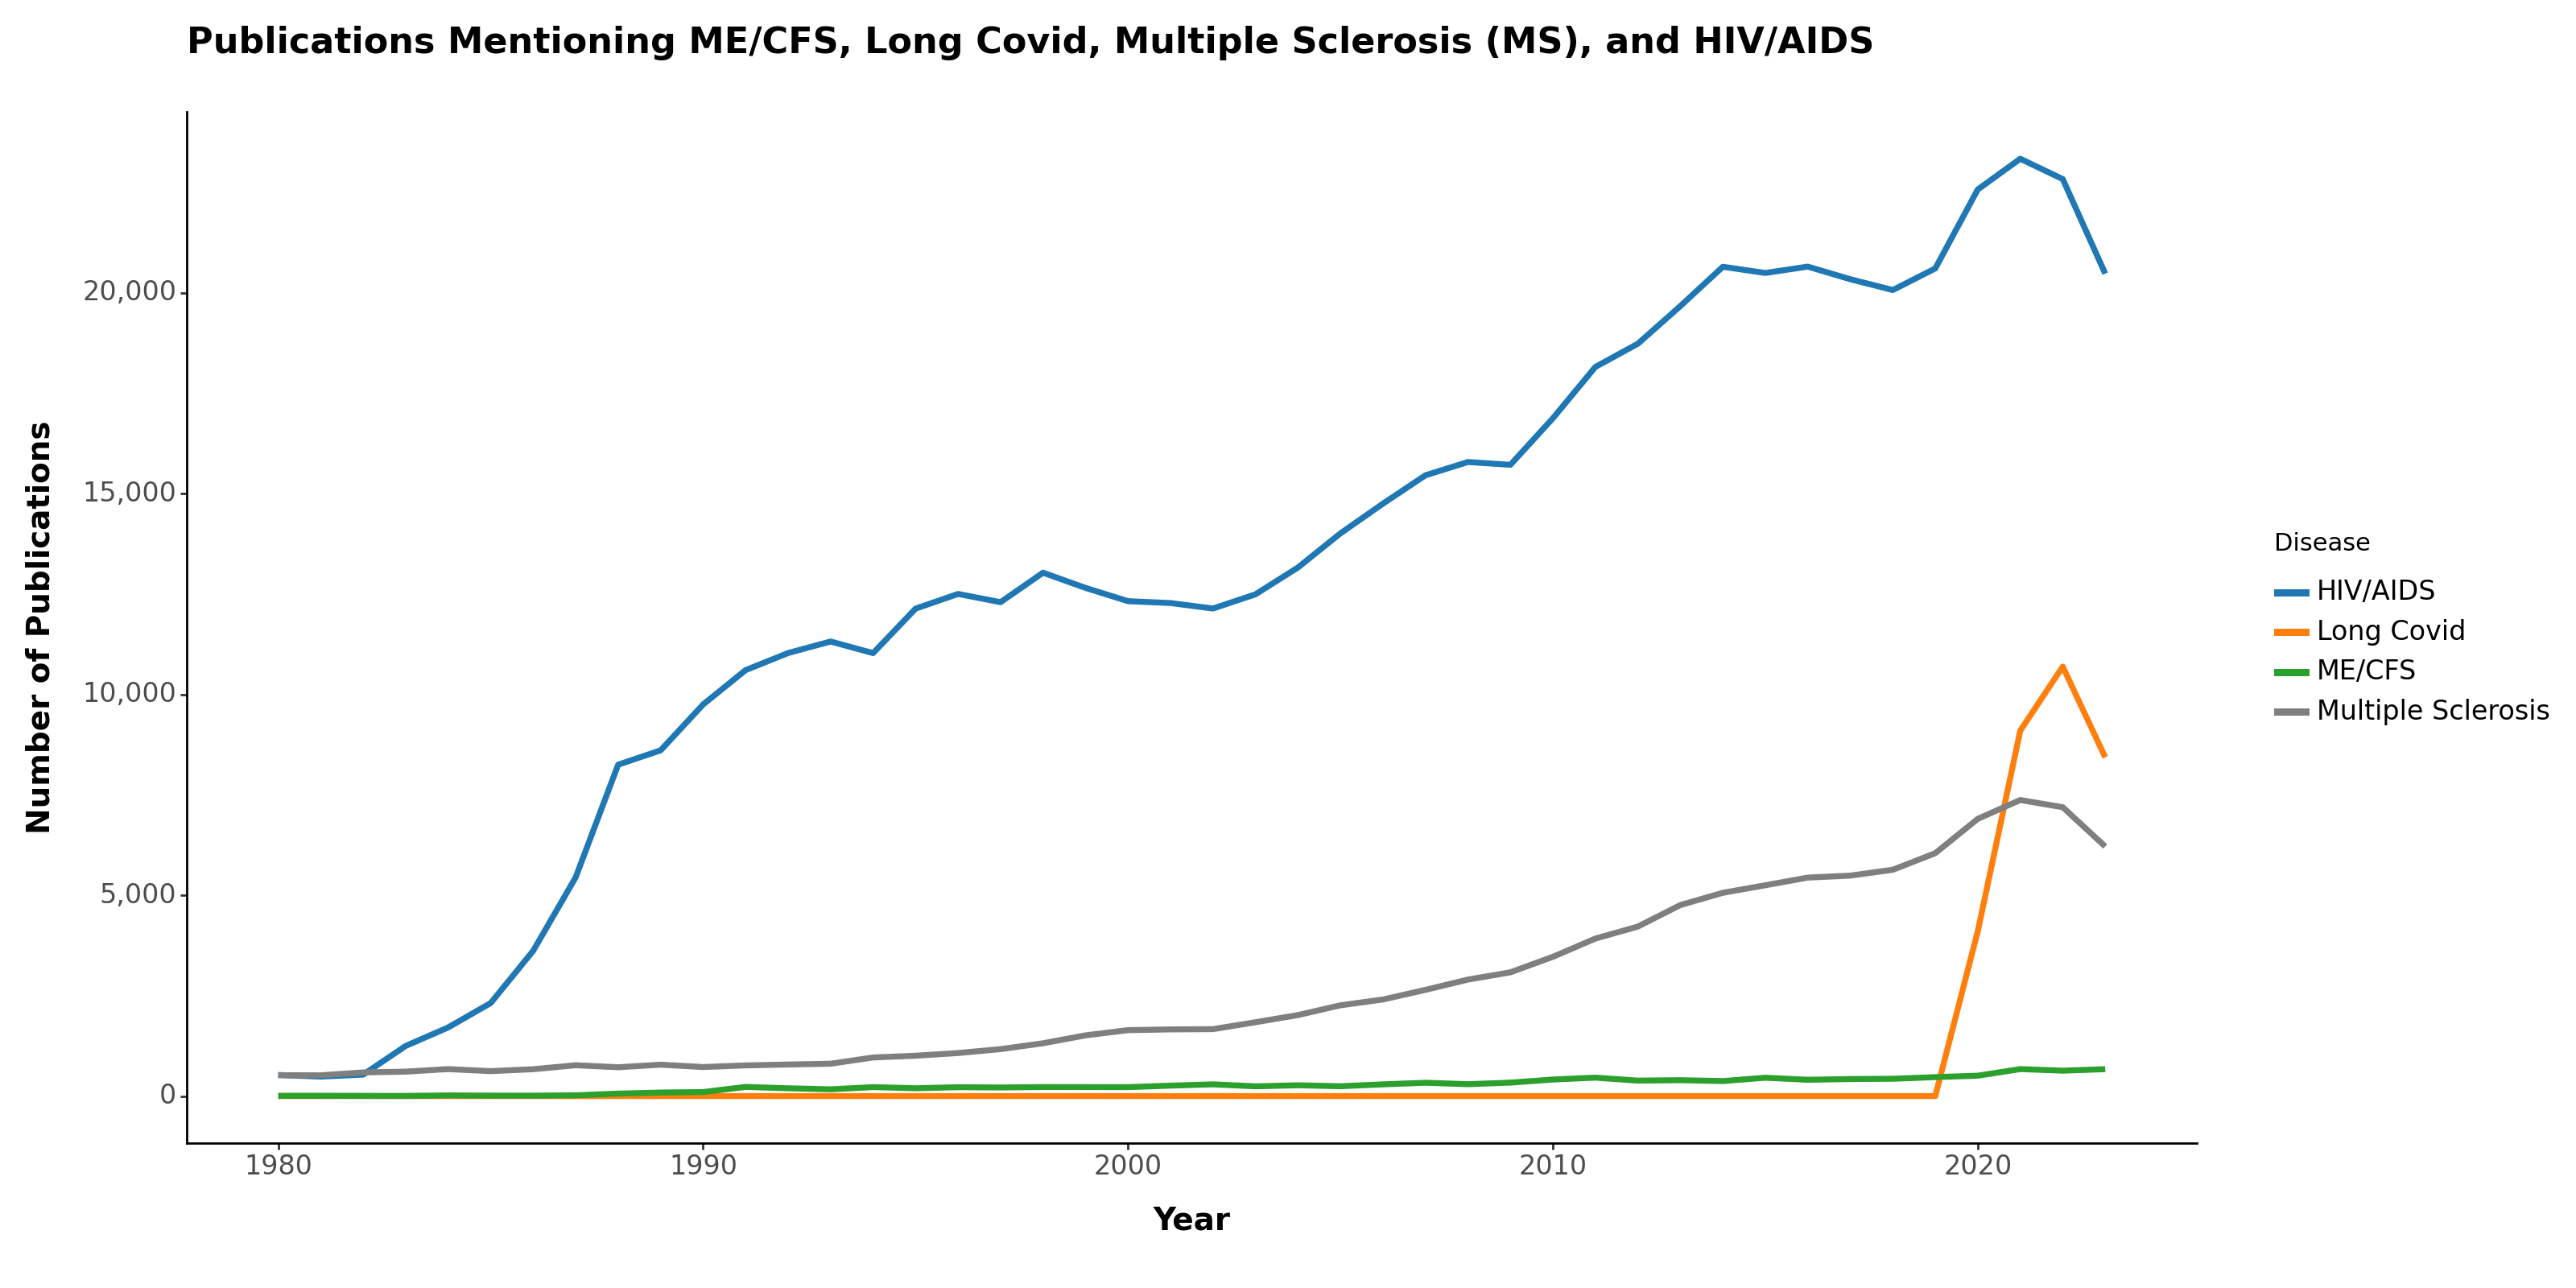

<Figure Size: (1600 x 800)>

In [11]:
# Create the plot
plot = (ggplot(long_df, aes(x='Year', y='Publications', color='Disease')) +
        geom_line(size=1.5) +
        labs(title='Publications Mentioning ME/CFS, Long Covid, Multiple Sclerosis (MS), and HIV/AIDS',
             x='Year',
             y='Number of Publications') +
        theme_classic() +
        theme(figure_size=(16, 8),
              axis_title=element_text(size=14, weight='bold'),
              axis_text=element_text(size=12),
              plot_title=element_text(size=16, weight='bold'),
              legend_text=element_text(size=12)) +
        scale_color_manual(values=["#1f77b4", "#ff7f0e", "#2ca02c"]) +
        scale_y_continuous(labels=comma_format())
       )

# Display the plot
plot

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 3 values. 4 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_color_manual can return a maximum of 3 values. 4 were requested from it.


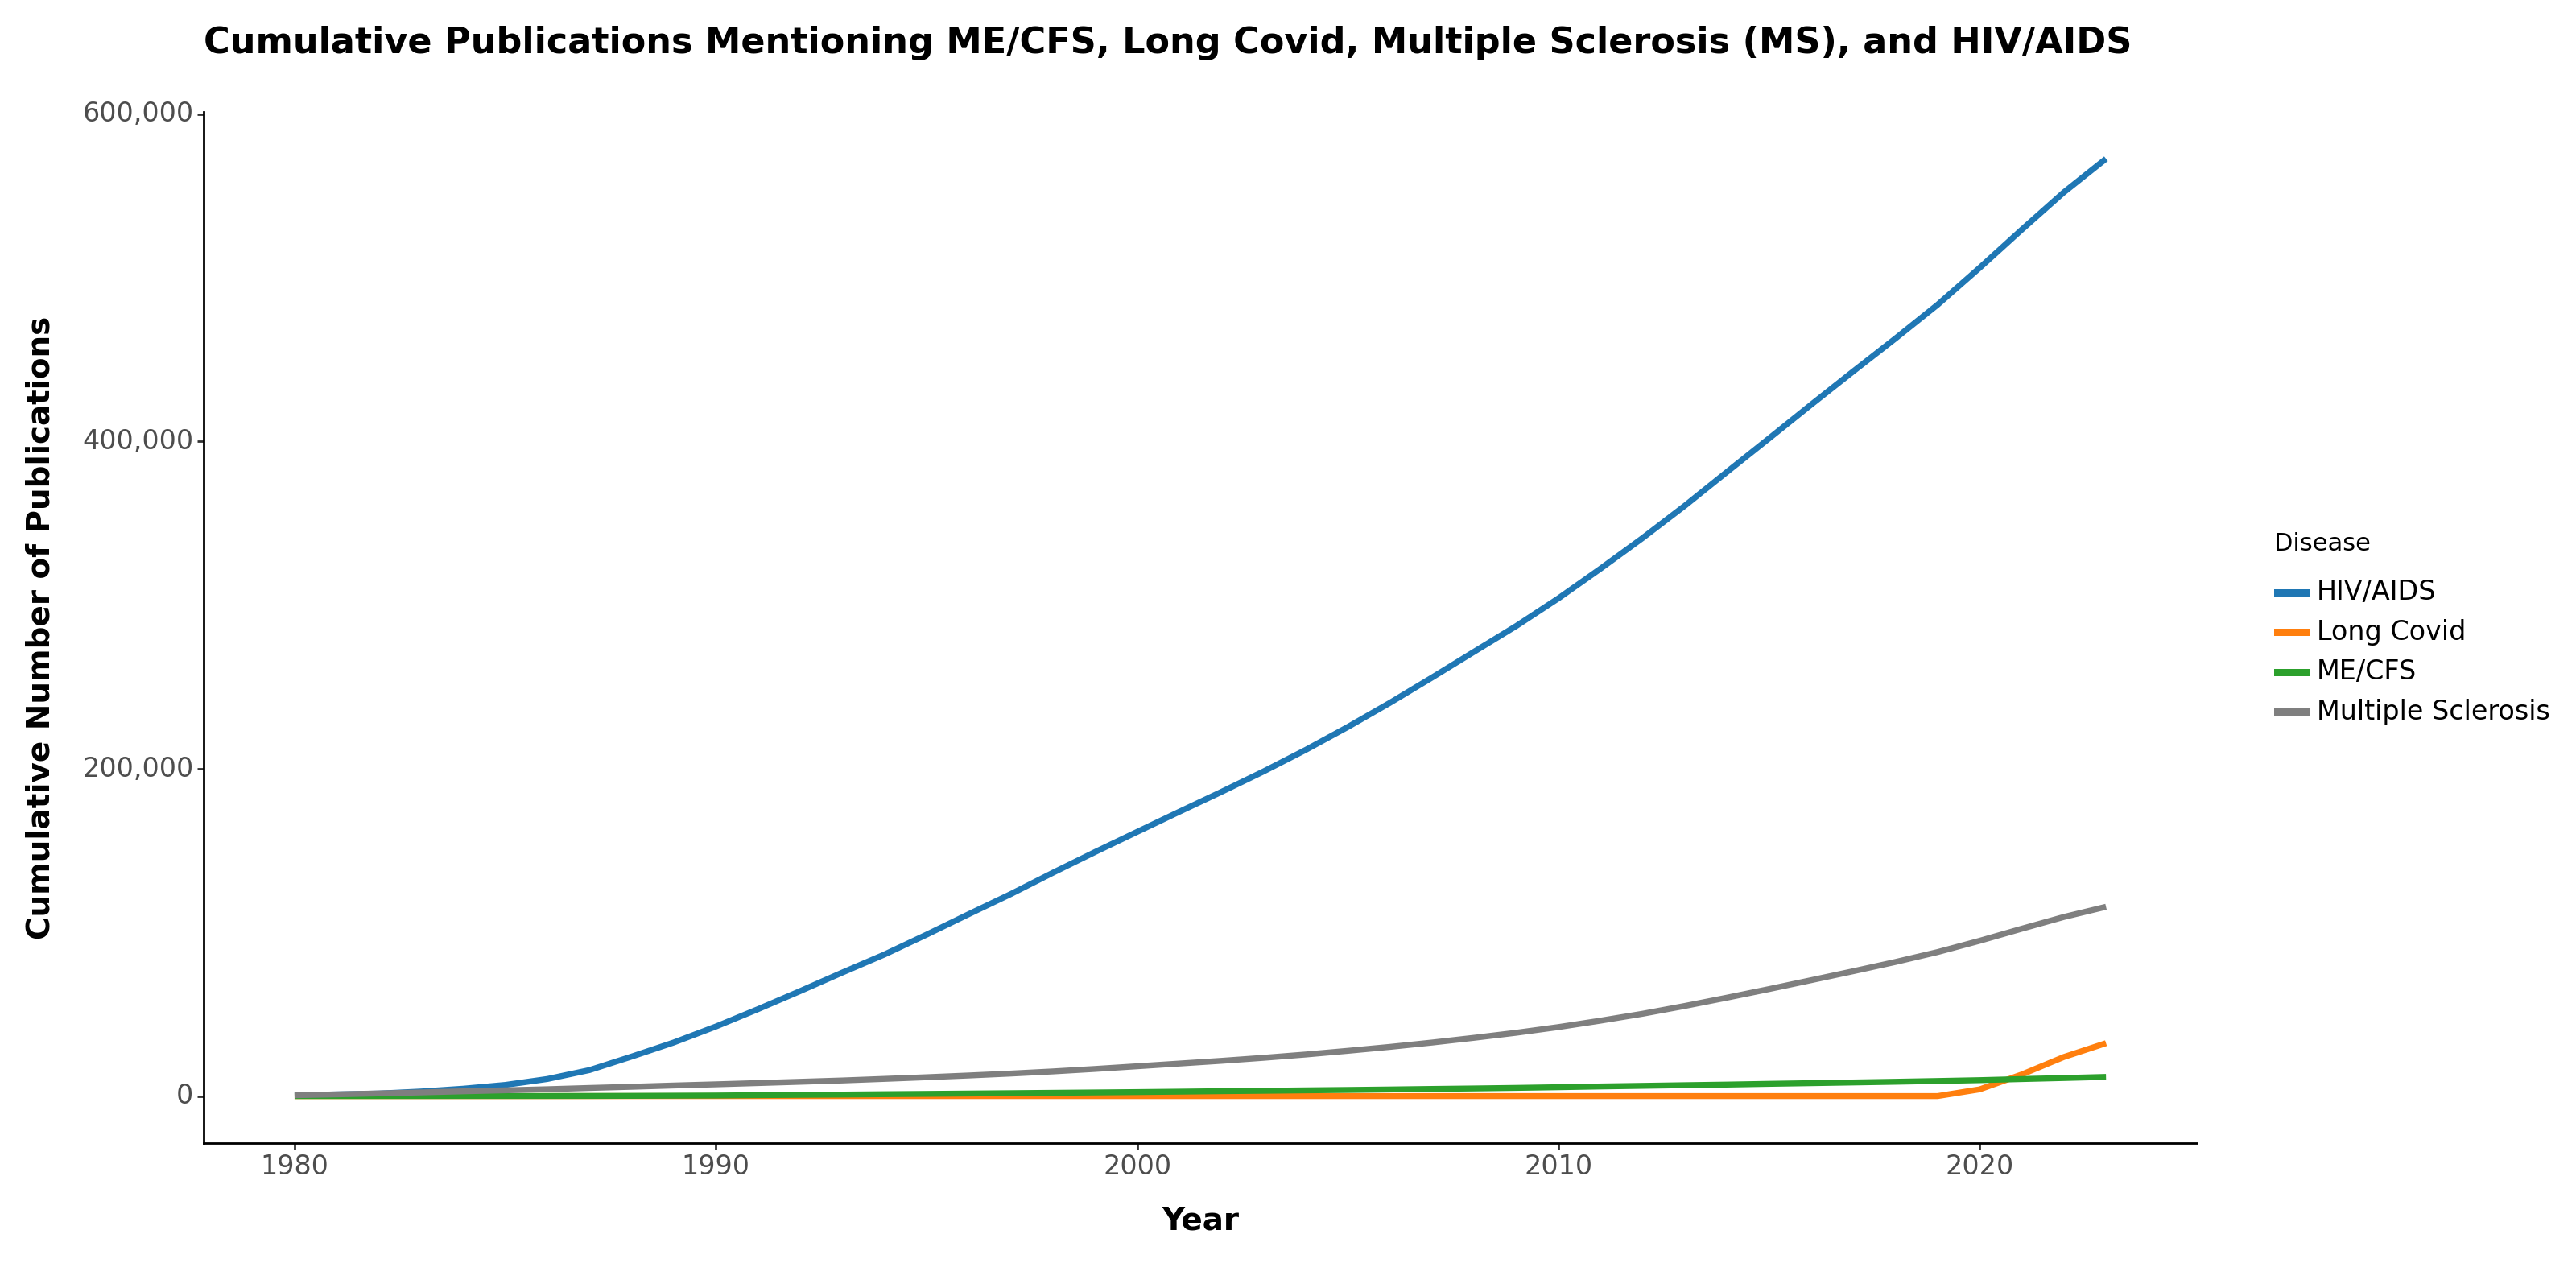

<Figure Size: (1600 x 800)>

In [12]:
# Plotting the cumulative data
cumulative_plot = (ggplot(long_df, aes(x='Year', y='Cumulative Publications', color='Disease')) +
                   geom_line(size=1.5) +
                   labs(title='Cumulative Publications Mentioning ME/CFS, Long Covid, Multiple Sclerosis (MS), and HIV/AIDS',
                        x='Year',
                        y='Cumulative Number of Publications') +
                   theme_classic() +
                   theme(figure_size=(16, 8),
                         axis_title=element_text(size=14, weight='bold'),
                         axis_text=element_text(size=12),
                         plot_title=element_text(size=16, weight='bold'),
                         legend_text=element_text(size=12)) +
                   scale_color_manual(values=["#1f77b4", "#ff7f0e", "#2ca02c"]) +
                   scale_y_continuous(labels=comma_format())
                  )

# Display the plot
cumulative_plot